## Pizza Place Sales Summary:
A year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas served, with additional details on the type, size, quantity, price, and ingredients.

### What to Look Into:

* Daily Customers: How many people order pizza each day? When are the busiest times?

* Popular Pizzas: How many pizzas do most customers order? Any pizzas that everyone seems to love?

* Total Earnings: How much money did the pizza place make this year? Are there patterns in sales during different times of the year?

* Menu Analysis: Are there pizzas that don't sell well? Any special deals or promotions that could boost sales?

## import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## calling in the 4  datasets

In [2]:
order=pd.read_csv(r"orders.csv") # 1st dataset called order
order.head() # this prints the five 5 rows

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [3]:
order.describe() # a describtive summary statistics of the dataset

,order_id
count,21350.000000
mean,10675.500000
std,6163.358459
min,1.000000
25%,5338.250000
50%,10675.500000
75%,16012.750000
max,21350.000000


In [4]:
order_details = pd.read_csv(r"order_details.csv") # 2nd dataset called order_details
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [5]:
order_details.describe() # a describtive summary statistics of the dataset

,order_details_id,order_id,quantity
count,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622
std,14035.529381,6180.119770,0.143077
min,1.000000,1.000000,1.000000
25%,12155.750000,5337.000000,1.000000
50%,24310.500000,10682.500000,1.000000
75%,36465.250000,16100.000000,1.000000
max,48620.000000,21350.000000,4.000000


In [6]:
pizza = pd.read_csv(r"pizzas.csv")
pizza.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [7]:
pizza.describe() # a describtive summary statistics of the dataset

,price
count,96.000000
mean,16.440625
std,4.090266
min,9.750000
25%,12.500000
50%,16.250000
75%,20.250000
max,35.950000


In [8]:
pizza_types = pd.read_csv(r"pizza_types.csv",encoding='latin')
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


## now we conbine all the four datasets into a dataframe

In [9]:
print(order.columns)
print(order_details.columns)
print(pizza.columns)
print(pizza_types.columns)

Index(['order_id', 'date', 'time'], dtype='object')
Index(['order_details_id', 'order_id', 'pizza_id', 'quantity'], dtype='object')
Index(['pizza_id', 'pizza_type_id', 'size', 'price'], dtype='object')
Index(['pizza_type_id', 'name', 'category', 'ingredients'], dtype='object')


In [10]:
# we look for a repeated columns to merge
# And name it 'pizzas'
pizzas = order.merge(order_details, on = 'order_id').merge(pizza, on='pizza_id').merge(pizza_types, on='pizza_type_id')
pizzas.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,77,2015-01-02,12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,146,2015-01-03,14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,163,2015-01-03,16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,247,2015-01-04,20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [11]:
pizzas.describe() # a describtive summary statistics of the dataset

,order_id,order_details_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,10701.479761,24310.500000,1.019622,16.494132
std,6180.119770,14035.529381,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,5337.000000,12155.750000,1.000000,12.750000
50%,10682.500000,24310.500000,1.000000,16.500000
75%,16100.000000,36465.250000,1.000000,20.250000
max,21350.000000,48620.000000,4.000000,35.950000


### now we clean and transform the data

In [12]:
pizzas.isna().sum() # check for null/empty values

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [13]:
pizzas.dtypes # check for data types

order_id              int64
date                 object
time                 object
order_details_id      int64
pizza_id             object
quantity              int64
pizza_type_id        object
size                 object
price               float64
name                 object
category             object
ingredients          object
dtype: object

In [14]:
# change both date and time columns from object to datetime
pizzas['date'] = pd.to_datetime(pizzas['date'])
pizzas['time'] = pd.to_datetime(pizzas['time'])

In [15]:
pizzas['sales'] = pizzas['quantity'] * pizzas['price'] #creating a sales column to calculate for the profit

In [16]:
pizzas.dtypes

order_id                     int64
date                datetime64[ns]
time                datetime64[ns]
order_details_id             int64
pizza_id                    object
quantity                     int64
pizza_type_id               object
size                        object
price                      float64
name                        object
category                    object
ingredients                 object
sales                      float64
dtype: object

#### we need to get day and month from the column 'date' and get hour from the column 'time' 

In [17]:
pizzas['day'] = pizzas['date'].dt.dayofweek+1 # create a day column
pizzas['month'] = pizzas['date'].dt.month # create a month column
pizzas['hour'] = pizzas['time'].dt.hour # create an hour column
pizzas.sample(10)

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,sales,day,month,hour
35236,4657,2015-03-19,2023-11-18 20:48:08,10636,four_cheese_l,1,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",17.95,4,3,20
6218,2182,2015-02-06,2023-11-18 12:22:30,4924,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75,5,2,12
9796,5631,2015-04-05,2023-11-18 12:01:49,12830,thai_ckn_l,1,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",20.75,7,4,12
8814,5315,2015-03-31,2023-11-18 12:48:46,12090,mexicana_l,1,mexicana,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",20.25,2,3,12
19966,19189,2015-11-24,2023-11-18 13:05:19,43636,ital_cpcllo_m,1,ital_cpcllo,M,16.00,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",16.00,2,11,13
10774,20874,2015-12-20,2023-11-18 20:19:45,47507,thai_ckn_l,1,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",20.75,7,12,20
21083,14938,2015-09-07,2023-11-18 14:56:16,33833,spicy_ital_l,1,spicy_ital,L,20.75,The Spicy Italian Pizza,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",20.75,1,9,14
48191,2348,2015-02-08,2023-11-18 20:58:36,5302,brie_carre_s,1,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni...",23.65,7,2,20
18611,720,2015-01-12,2023-11-18 17:53:59,1612,green_garden_m,1,green_garden,M,16.00,The Green Garden Pizza,Veggie,"Spinach, Mushrooms, Tomatoes, Green Olives, Fe...",16.00,1,1,17
39628,16648,2015-10-08,2023-11-18 18:44:02,37705,ital_veggie_l,1,ital_veggie,L,21.00,The Italian Vegetables Pizza,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ...",21.00,4,10,18


In [18]:
pizzas['month'].unique() # to confirm the months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [19]:
pizzas['day'].unique() # to confrim the days

array([4, 5, 6, 7, 2, 3, 1], dtype=int64)

In [20]:
pizzas['hour'].unique() # to confirm 

array([11, 12, 14, 16, 20, 17, 13, 18, 19, 15, 21, 22, 23,  9, 10],
      dtype=int64)

#### we want the day and the month in a word form, spo we create dictionaries

In [21]:
day = {1:'Monday', 2:'Tueday',3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
month = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

In [22]:
pizzas['day'] = pizzas['day'].map(day)

In [23]:
pizzas['month'] = pizzas['month'].map(month)

In [24]:
pizzas.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,sales,day,month,hour
0,1,2015-01-01,2023-11-18 11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,Thursday,Jan,11
1,77,2015-01-02,2023-11-18 12:22:46,179,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,Friday,Jan,12
2,146,2015-01-03,2023-11-18 14:22:10,357,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,Saturday,Jan,14
3,163,2015-01-03,2023-11-18 16:54:54,389,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,Saturday,Jan,16
4,247,2015-01-04,2023-11-18 20:55:29,568,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25,Sunday,Jan,20


## Daily Customers:
* How many people order pizza each day?
* When are the busiest times?

In [25]:
pizzas['order_id'].drop_duplicates().count() # orders fot whole year

21350

In [26]:
pizzas['date'].drop_duplicates().count() # total days operated in a the year

358

In [27]:
round(pizzas['order_id'].drop_duplicates().count() / pizzas['date'].drop_duplicates().count(),0)

60.0

* averagely, about 60 people orders pizza in a day

In [28]:
busy_hour = pizzas.groupby('hour')['quantity'].count().sort_values(ascending=False).reset_index()
busy_hour.head()

,hour,quantity
0,12,6543
1,13,6203
2,18,5359
3,17,5143
4,19,4350


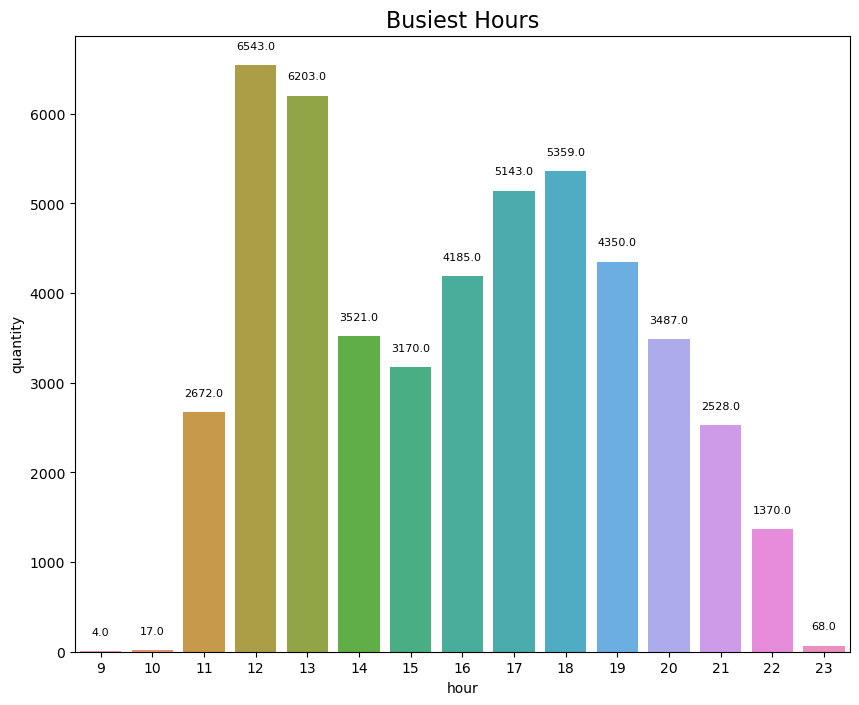

In [69]:
plt.figure(figsize=(10,8))
busy_hour1 = sns.barplot(data=busy_hour, x='hour', y='quantity')
plt.title('Busiest Hours', fontsize=16)
for p in busy_hour1.patches:
    busy_hour1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()

* therefore, the busiest hours are:
    12, 13, 18 and 17

## Popular Pizzas: 
* How many pizzas do most customers order? 
* Any pizzas that everyone seems to love?

In [30]:
ordered_quantity = pizzas['quantity'].value_counts()
ordered_quantity

1    47693
2      903
3       21
4        3
Name: quantity, dtype: int64

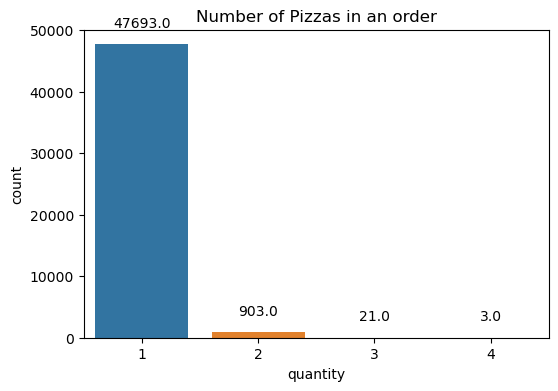

In [79]:
plt.figure(figsize=(6,4))
popular_pizzas = sns.countplot(data=pizzas, x='quantity')
plt.title('Number of Pizzas in an order')
for p in popular_pizzas.patches:
    popular_pizzas.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()

plt.show()

* we can see that most customers order for one (1) quantity of pizza

In [32]:
favorite_pizzas = pizzas.groupby('name')['quantity'].count().sort_values(ascending=False).reset_index()
favorite_pizzas

,name,quantity
0,The Classic Deluxe Pizza,2416
1,The Barbecue Chicken Pizza,2372
2,The Hawaiian Pizza,2370
3,The Pepperoni Pizza,2369
4,The Thai Chicken Pizza,2315
5,The California Chicken Pizza,2302
6,The Spicy Italian Pizza,1887
7,The Sicilian Pizza,1887
8,The Southwest Chicken Pizza,1885
9,The Four Cheese Pizza,1850


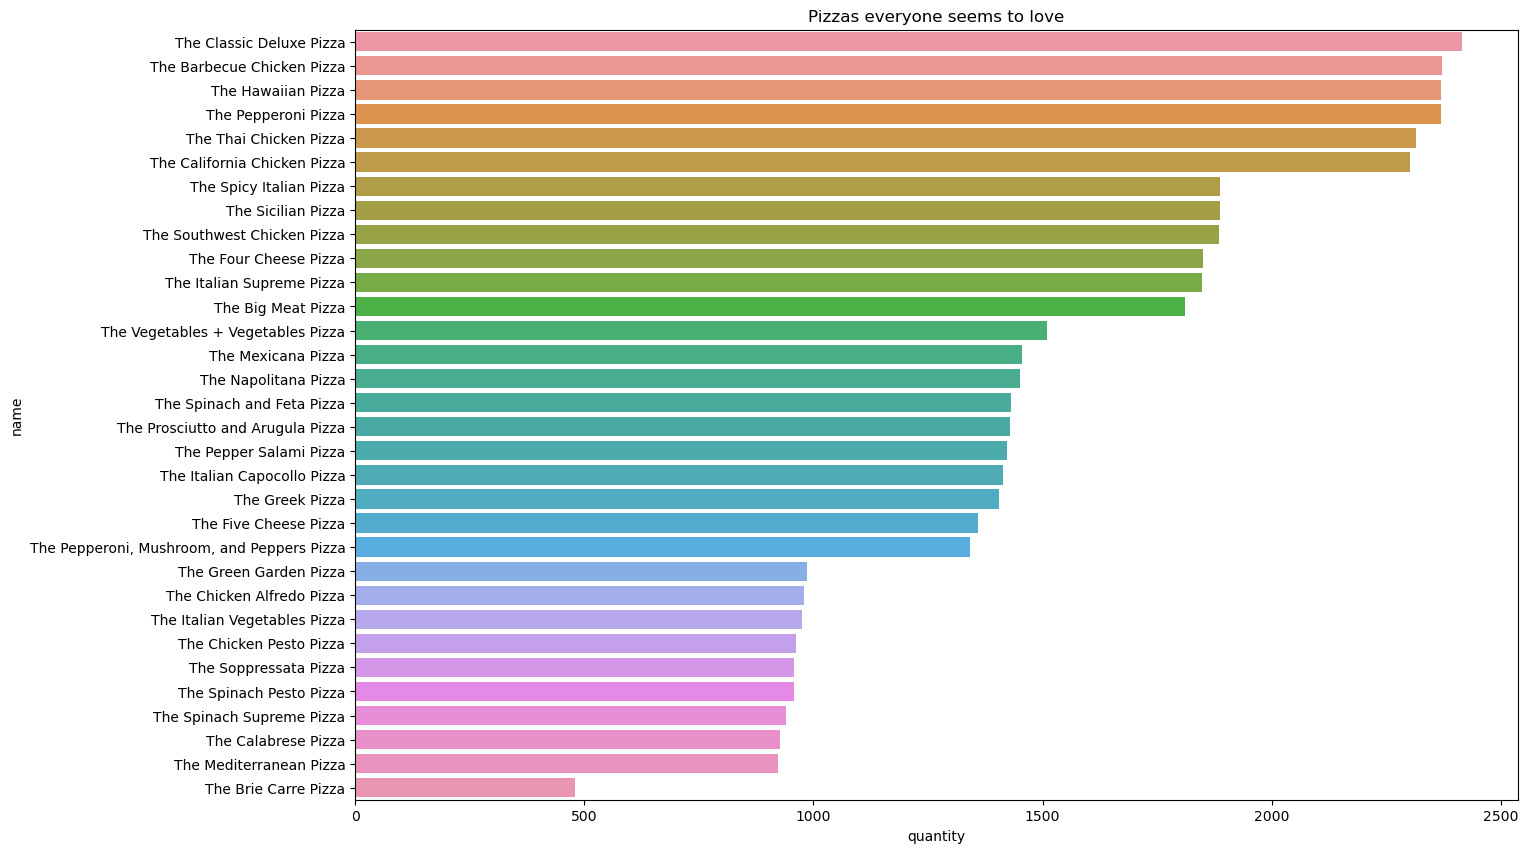

In [82]:
plt.figure(figsize=(15,10))
sns.barplot(data=favorite_pizzas,x='quantity', y='name', orient='h')
plt.title('Pizzas everyone seems to love')
plt.show()

#### pizzas that everyone seems to love are:
* The Classic Deluxe Pizza
* The Barbecue Chicken Pizza
* The Hawaiian Pizza
* The Pepperoni Pizza

## Total Earnings:
* How much money did the pizza place make this year? 
* Are there patterns in sales during different times of the year?

In [34]:
pizzas['sales'].sum()

817860.05

* an amount of 817860.05 was made in a year

In [57]:
# Define the custom order of months
custom_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'month' to a categorical type with the custom order
pizzas['month'] = pd.Categorical(pizzas['month'], categories=custom_order, ordered=True)

# Group by the custom-ordered 'month' and count the sales
patterns = pizzas.groupby('month')['sales'].count().reset_index()
patterns


,month,sales
0,Jan,4156
1,Feb,3892
2,Mar,4186
3,Apr,4067
4,May,4239
5,Jun,4025
6,Jul,4301
7,Aug,4094
8,Sep,3819
9,Oct,3797


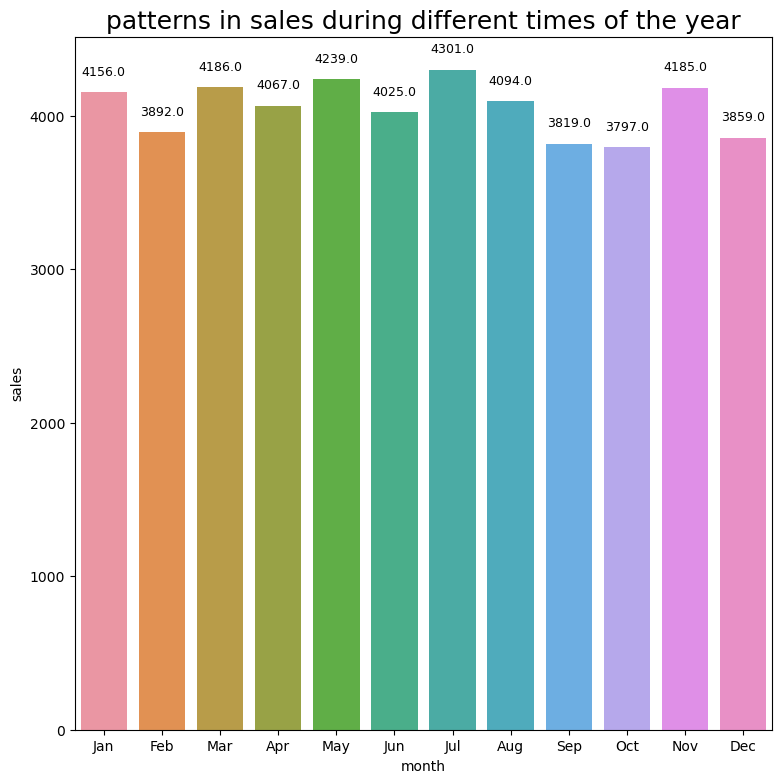

In [89]:
plt.figure(figsize=(9,9))
patterns1 = sns.barplot(data=patterns, x='month', y='sales')
plt.title('patterns in sales during different times of the year', fontsize=18)
#plt.grid(axis='y')
for p in patterns1.patches:
    patterns1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.show()



#### Looking at the sales data for each month, we can identify some patterns:

* Seasonal Trends: There seems to be a fluctuation in sales throughout the year. For example, sales are relatively high in July and December, possibly due to summer vacations and the holiday season.

* Mid-Year Dip: There's a dip in sales around September, suggesting a potential decrease in pizza orders during that time.

* Steady Sales: Months like February and October have relatively consistent sales.

## Menu Analysis:
* Are there pizzas that don't sell well?
* Any special deals or promotions that could boost sales?

In [63]:
unfavorite_pizzas = pizzas.groupby('name')['quantity'].count().sort_values(ascending=True).reset_index()
unfavorite_pizzas.head()

,name,quantity
0,The Brie Carre Pizza,480
1,The Mediterranean Pizza,923
2,The Calabrese Pizza,927
3,The Spinach Supreme Pizza,940
4,The Soppressata Pizza,957


* The Brie Carre Pizza does not sell well

##### To identify potential special deals or promotions that could boost sales, you can analyze the quantity sold for each pizza type. Here are some observations:

* Bestsellers: The top-selling pizzas, such as "The Classic Deluxe Pizza," "The Barbecue Chicken Pizza," and "The Hawaiian Pizza," could be highlighted in promotions or bundle deals.
* Underperforming Pizzas: Pizzas with lower quantities sold, like "The Brie Carre Pizza" or "The Mediterranean Pizza," might benefit from targeted promotions or adjustments to the menu.
*Combo Deals: Consider creating combo deals that include popular pizzas. For example, a combo with "The Classic Deluxe Pizza" and "The Pepperoni Pizza" might attract more customers.

* Seasonal Specials: Introduce seasonal promotions or limited-time offers based on popular choices. For instance, a summer promotion featuring refreshing pizzas like "The California Chicken Pizza" could be appealing.

* Discounts on Less Popular Pizzas: Offer discounts or promotions on pizzas with lower sales to encourage customers to try new options.